In [1]:
import cvxopt
from cvxopt import solvers
from cvxopt import matrix
import numpy as np
from scipy.linalg import null_space
import math
from sympy import Matrix
import sympy
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
def bm(So,mu,sigma,N):
    b=mu*(1/N)+sigma*np.sqrt(1/N)*np.random.normal(0,1,N)
    b=np.insert(b,0,So,axis=None)
    S=np.cumsum(b)
    return S
        
def generate_gbm_prices(start_price,instance,N,days,mu,sigma):
    """
    start_price: is the initial price same as So as above instance: are number of simulations you want increments: are increments in a day, same as N above days: # of total no of trading days
    """
    ins=instance
    prices=pd.DataFrame()
    for i in range(1,ins+1):
 #here what to put BM or increments 
        So=start_price
        temp=bm(So,mu,sigma,N)
        prices=pd.concat([prices,pd.Series(temp)],axis=1)
        print("loop {} complete, time: {}".format(i,datetime.datetime.now().time()))
    prices.columns=np.arange(1,ins+1,1) 
    return prices 

 #the below function labels the data properly 
def give_labels(N,days,data):
    obs_nu = np.arange(0,N+1) 
    final_prices=pd.DataFrame() 
    for i in range(1,days+1):
        temp_ = data.loc[N*(i-1):N*i] 
        day_label=[]
        for j in range(N+1):
            day_label.append('day'+str(i))
        tuples=list(zip(day_label,obs_nu))
        index=pd.MultiIndex.from_tuples(tuples,names=['DAY','#INCREMENT'])
        temp_1=pd.DataFrame(temp_.values,index=index)
        final_prices=pd.concat([final_prices,temp_1])
    return final_prices

def ochl_data(instances,N,days,data): 
    data_fin=pd.DataFrame()
    zz=data
    for i in range(instances):
        for j in range(1,days+1): 
            temp=pd.DataFrame({'OPEN':zz.loc['day'+str(j)][i][0],
                                            "CLOSE":zz.loc['day'+str(j)][i][N],
                                         'HIGH':max(zz.loc['day'+str(j)][i]),
                                        'LOW': min(zz.loc['day'+str(j)][i])},
                                 index=pd.MultiIndex.from_tuples([('Simulation'+str(i+1),
                                     'day'+str(j))],names=['Simulation#','DAY']))
            data_fin=pd.concat([data_fin,temp]) 
    return data_fin

In [60]:
import datetime
start_price=0
ins=200
N=700000
days=1
mu=0
sigma=np.sqrt(0.2)
soln=generate_gbm_prices(start_price=start_price,instance=ins,N=N,days=days,mu=mu,sigma=sigma)
ac_w_lab= give_labels(N,days,soln)
final=ochl_data(ins,N,days,ac_w_lab)

loop 1 complete, time: 20:00:30.087944
loop 2 complete, time: 20:00:30.134836
loop 3 complete, time: 20:00:30.196570
loop 4 complete, time: 20:00:30.267637
loop 5 complete, time: 20:00:30.352851
loop 6 complete, time: 20:00:30.428672
loop 7 complete, time: 20:00:30.514001
loop 8 complete, time: 20:00:30.638533
loop 9 complete, time: 20:00:30.740406
loop 10 complete, time: 20:00:30.859246
loop 11 complete, time: 20:00:31.009700
loop 12 complete, time: 20:00:31.173879
loop 13 complete, time: 20:00:31.358976
loop 14 complete, time: 20:00:31.512039
loop 15 complete, time: 20:00:31.682278
loop 16 complete, time: 20:00:31.875840
loop 17 complete, time: 20:00:32.059719
loop 18 complete, time: 20:00:32.325474
loop 19 complete, time: 20:00:33.329047
loop 20 complete, time: 20:00:33.686526
loop 21 complete, time: 20:00:34.021526
loop 22 complete, time: 20:00:34.291411
loop 23 complete, time: 20:00:34.577718
loop 24 complete, time: 20:00:34.868200
loop 25 complete, time: 20:00:35.233418
loop 26 c

In [57]:
soln

,1,2
0,0.000000,0.000000
1,-0.000599,-0.000012
2,-0.000186,0.001031
3,-0.000313,0.000964
4,0.000617,0.000677
5,0.000872,0.000997
6,0.000895,0.001446
7,0.000426,0.001702
8,0.000666,0.002022
9,0.001187,0.000825


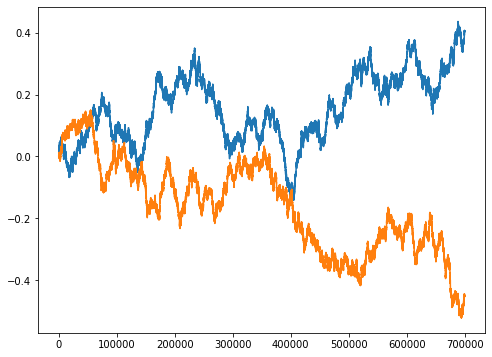

In [58]:
# plt.figure(figsize=(8,6))
# plt.plot(soln)
# plt.show()

In [61]:
ac_w_lab= give_labels(N,days,soln)
ac_w_lab

0         1         2         3         4         5    \
DAY  #INCREMENT                                                               
day1 0           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
     1           0.000011 -0.000394  0.000512 -0.000777  0.000561  0.000029   
     2           0.000106 -0.000276 -0.000409 -0.001034  0.000904  0.001008   
     3          -0.000643 -0.000493 -0.000158 -0.001020  0.000699  0.001368   
     4          -0.000924 -0.000399  0.000357 -0.000909  0.000485  0.002078   
     5          -0.000762 -0.000121 -0.000522 -0.000409  0.000480  0.002131   
     6          -0.000939 -0.000521 -0.001420  0.000191  0.000821  0.001775   
     7          -0.000584 -0.000828 -0.001784  0.000774  0.000428  0.003200   
     8          -0.000874 -0.000436 -0.001577 -0.000254  0.000198  0.003858   
     9          -0.001441 -0.000790 -0.000751 -0.000132 -0.000150  0.004280   
     10         -0.001666 -0.000385 -0.001459  0.000298 -0.000552  0.003094   
     11         -0.001958 -0.000702 -0.000244  0.000223 -0.000765  0.003390   
     12         -0.002301 -0.000759 -0.000574 -0.000991 -0.000334  0.002802   
     13         -0.002058 -0.000980 -0.000045 -0.001383 -0.000560  0.003343   
     14         -0.002527 -0.000882 -0.000631 -0.001654 -0.001393  0.003783   
     15         -0.002282 -0.000349 -0.000393 -0.001774 -0.000530  0.003864   
     16         -0.002541 -0.000209  0.000135 -0.000959 -0.000924  0.003104   
     17         -0.002076 -0.000700 -0.000677 -0.001146 -0.000253  0.002728   
     18         -0.002269 -0.000917  0.000470 -0.001528  0.000419  0.003055   
     19         -0.001522 -0.000687  0.000884 -0.001645  0.000591  0.002685   
     20         -0.001415  0.000080  0.000515 -0.002353  0.000651  0.002571   
     21         -0.001944  0.000087  0.001221 -0.002645  0.000741  0.002927   
     22         -0.001451  0.000409  0.002006 -0.002307  0.000624  0.003308   
     23         -0.001471  0.000340  0.002774 -0.002817  0.000947  0.004349   
     24         -0.000537 -0.000848  0.002664 -0.003419  0.000499  0.004853   
     25         -0.000029 -0.000123  0.002794 -0.003829  0.000313  0.005209   
     26         -0.000124 -0.000378  0.002147 -0.004671  0.000308  0.005026   
     27          0.000518  0.000590  0.002167 -0.004993  0.001332  0.004872   
     28         -0.000389  0.000152  0.002262 -0.003918  0.000784  0.004460   
     29          0.000543  0.000003  0.001770 -0.004162  0.000668  0.004829   
...                   ...       ...       ...       ...       ...       ...   
     699971      0.354852  0.036348 -0.941832  0.400277  0.280597 -0.290106   
     699972      0.355940  0.037204 -0.941624  0.399098  0.281444 -0.290232   
     699973      0.356097  0.036031 -0.940988  0.399986  0.282264 -0.291017   
     699974      0.355546  0.035817 -0.941871  0.400248  0.282934 -0.290255   
     699975      0.354614  0.035842 -0.942586  0.400292  0.283406 -0.291038   
     699976      0.354464  0.035576 -0.942613  0.400970  0.282588 -0.291776   
     699977      0.355389  0.036097 -0.942869  0.400640  0.282365 -0.291142   
     699978      0.354798  0.035398 -0.942072  0.400904  0.282424 -0.291391   
     699979      0.354289  0.036123 -0.942315  0.400735  0.281705 -0.291757   
     699980      0.354378  0.037454 -0.943288  0.399820  0.281964 -0.291885   
     699981      0.354169  0.037360 -0.943858  0.400515  0.280411 -0.292377   
     699982      0.354351  0.036509 -0.942802  0.399169  0.281147 -0.291431   
     699983      0.354165  0.035578 -0.942373  0.399634  0.281125 -0.292090   
     699984      0.353969  0.035696 -0.942265  0.399557  0.281235 -0.292594   
     699985      0.353783  0.036034 -0.941984  0.399557  0.280466 -0.292922   
     699986      0.353056  0.035725 -0.941614  0.400136  0.280431 -0.291820   
     699987      0.352863  0.036388 -0.941787  0.399474  0.280758 -0.292311   
     699988      0.352750  0.036277 -0.941495  0.399819  0.280827 -0.292

In [62]:
final=ochl_data(ins,N,days,ac_w_lab)
final

,,OPEN,CLOSE,HIGH,LOW
Simulation#,DAY,,,,
Simulation1,day1,0.0,0.350732,0.545312,-0.231331
Simulation2,day1,0.0,0.035793,0.255532,-0.200219
Simulation3,day1,0.0,-0.943131,0.028357,-0.947900
Simulation4,day1,0.0,0.401963,0.583918,-0.100945
Simulation5,day1,0.0,0.281959,0.633528,-0.107437
Simulation6,day1,0.0,-0.294575,0.123994,-0.421113
Simulation7,day1,0.0,0.266251,0.355473,-0.376251
Simulation8,day1,0.0,0.348594,0.512356,-0.001213
Simulation9,day1,0.0,0.368812,0.578419,-0.009949


In [241]:
final['ln O']= (final["OPEN"])
final['ln C']= (final["CLOSE"])
final['ln H']= (final["HIGH"])
final['ln L']= (final["LOW"])
final['u^2']=((final["HIGH"])-(final["OPEN"]))**2
final['d^2']=((final["LOW"])-(final["OPEN"]))**2
final['c^2']=((final["CLOSE"])-(final["OPEN"]))**2
final['ud']= final["HIGH"]*final["LOW"]
final['uc']=  final["HIGH"]*final["CLOSE"]
final['dc']=  final["CLOSE"]*final["LOW"]


In [1]:
final

NameError: name 'final' is not defined

In [243]:
final.to_excel("test.xlsx")

In [ ]:
def bm(So,mu,sigma,N):
    S=[]
    S.append(So)
        b=mu*(1/N)+sigma*np.sqrt(1/N)*np.random.normal(0,1,N)
        b=cumsum(b)
    return S
    

In [7]:
mu=0
So=2
sigma=1
N=10
S=[]
S.append(So)
b=mu*(1/N)+sigma*np.sqrt(1/N)*np.random.normal(0,1,N)
b=np.cumsum(b)

In [8]:
b

array([0.39973034, 0.84677044, 1.3824604 , 1.09039992, 1.45755243,
       2.15852258, 1.90021076, 1.80123801, 2.26905848, 2.07233355])

ValueError: zero-dimensional arrays cannot be concatenated

In [14]:
c=b+S[0]
S.append(c)

In [25]:
c

array([2.39973034, 2.84677044, 3.3824604 , 3.09039992, 3.45755243,
       4.15852258, 3.90021076, 3.80123801, 4.26905848, 4.07233355])

In [29]:
len(np.insert(c,0,2,axis=None))

11

In [15]:
S

[2, array([2.39973034, 2.84677044, 3.3824604 , 3.09039992, 3.45755243,
        4.15852258, 3.90021076, 3.80123801, 4.26905848, 4.07233355])]

ValueError: setting an array element with a sequence.

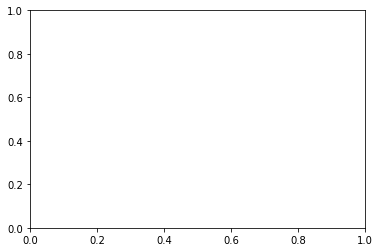

In [17]:
plt.plot(S)

In [32]:
bm(2,0,1,10)

array([2.        , 1.8227566 , 1.84027656, 1.72037104, 1.42272051,
       1.16108714, 1.43271743, 1.55720537, 1.26264081, 1.12640324,
       1.31065876])

In [33]:
N=10
mu=0
sigma=1
b=mu*(1/N)+sigma*np.sqrt(1/N)*np.random.normal(0,1,N)
   

In [34]:
b

array([-0.05765534, -0.0254566 ,  0.43993914, -0.49287763,  0.36413272,
       -0.18784408,  0.20470564,  0.61627106, -0.09901988, -0.14266409])

In [36]:
So=2
b=np.insert(b,0,So,axis=None)
   

In [37]:
b

array([ 2.        , -0.05765534, -0.0254566 ,  0.43993914, -0.49287763,
        0.36413272, -0.18784408,  0.20470564,  0.61627106, -0.09901988,
       -0.14266409])

In [38]:

S=np.cumsum(b)

In [39]:
S

array([2.        , 1.94234466, 1.91688806, 2.35682721, 1.86394958,
       2.2280823 , 2.04023822, 2.24494386, 2.86121493, 2.76219504,
       2.61953095])